In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
df = pd.read_csv('/content/drive/My Drive/D3.csv')

# Show the first 5 rows of the DataFrame
print(df.head())
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

Mounted at /content/drive
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


100

In [3]:
X2 = df.values[:, 0]  # get input values from first column 
y = df.values[:, 1]  # get output values from second column 
m = len(y) # Number of training examples 
print('X2 = ', X2[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 
print('m = ', m) 

X2 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
m =  100


In [6]:
X2 = df.values[:, 1]  # get input values from first column 
y = df.values[:, 3]  # get output values from second column 
m = len(y) # Number of training examples 
print('X2 = ', X2[: 97]) # Show only first 5 records 
print('y = ', y[: 97]) 
print('m = ', m) 

X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798 2.91474747
 3.60969697 0.30464646 0.99959596 1.69454546 2.38949495 3.08444444
 3.77939394 0.47434343 1.16929293 1.86424242 2.55919192 3.25414141
 3.94909091 0.6440404  1.3389899  2.03393939 2.72888889 3.42383838
 0.11878788 0.81373737 1.50868687 2.20363636 2.89858586 3.59353535
 0.28848485 0.98343434 1.67838384 2.37333333 3.06828283 3.76323232
 0.45818182 1.15313131 1.84808081 2.5430303  3.2379798  3.93292929
 0.62787879 1.32282828 2.01777778 2.71272727 3.40767677 0.10262626
 0.79757576 1.49252525 2.18747475 2.88242424 3.57737374 0.27232323
 0.96727273 1.66222222 2.35717172 3.05212121 3.74707071 0.4420202
 1.1369697  1.83191919 2.52686869 3.22181818 3.91676768 0.61171717
 1.30666667 2.00161616 2.69656566 3.39151515 0.08646465 0.78141414
 1.47636364 2.17131313 2.86626263 3.56121212 0.25616162 0.95111111
 1.64606061 2.3410101  3.0359596  3.73090909 0.42585859 1.12080808
 1.81575758 2.51070707 3.20565657 3.90060606 0.59555556 1

Text(0.5, 1.0, 'Scatter plot of training data')

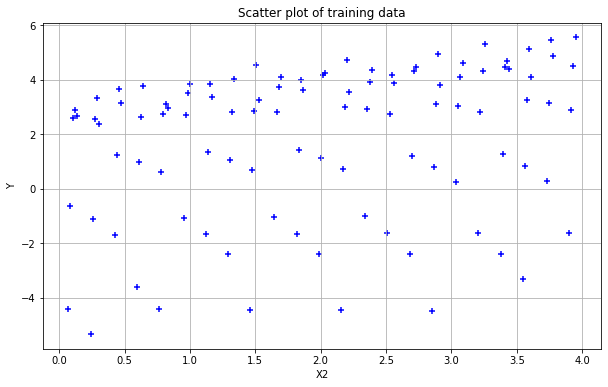

In [8]:
plt.scatter(X2,y, color='blue',marker= '+')
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('X2') 
plt.ylabel('Y') 
plt.title('Scatter plot of training data') 

In [9]:
m = len(y)
#Lets create a matrix with three columns of ones and x1, x2, x3 values
X_0 = np.ones((m, 3))
X_0[:, 1] = X2

X_0[:5]

array([[1.        , 3.44      , 1.        ],
       [1.        , 0.1349495 , 1.        ],
       [1.        , 0.82989899, 1.        ],
       [1.        , 1.52484848, 1.        ],
       [1.        , 2.21979798, 1.        ]])

In [10]:

# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_1 = X2.reshape(m, 1) 
X_1[:10] 

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [11]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 3.44      , 1.        , 3.44      ],
       [1.        , 0.1349495 , 1.        , 0.1349495 ],
       [1.        , 0.82989899, 1.        , 0.82989899],
       [1.        , 1.52484848, 1.        , 1.52484848],
       [1.        , 2.21979798, 1.        , 2.21979798]])

In [12]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [15]:
def linear_regression_gd(X2, y, learning_rate, num_iterations):
    m = X2.shape[0]
    X2 = np.column_stack((np.ones(m), X2))
    theta = np.zeros(X2.shape[1])
    for i in range(num_iterations):
        predictions = np.dot(X2, theta)
        errors = predictions - y
        gradient = np.dot(X2.T, errors) / m
        theta = theta - learning_rate * gradient
    return theta

def run_regression(X2, y, learning_rate, num_iterations):
    results = []
    for i in range(X2.shape[1]):
        X_i = X2[:, i].reshape(-1, 1)
        theta = linear_regression_gd(X_i, y, learning_rate, num_iterations)
        results.append(theta)
    return results

# Example usage
X2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([1, 2, 3])
learning_rate = 0.05
num_iterations = 100

results = run_regression(X2, y, learning_rate, num_iterations)
for i, theta in enumerate(results):
    print(f"Theta for x{i + 1}: {theta}")



Theta for x1: [0.51154797 0.36187915]
Theta for x2: [0.22785055 0.35045083]
Theta for x3: [ -29856.51077073 -208298.80186564]


In [ ]:
# Lets compute the cost for theta values 
def compute_cost(X1, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost
    print('The cost for given values of theta_0 and theta_1 =', cost) 